# Interactive plotting

In [1]:
import discretisedfield as df
import discretisedfield.util as dfu
%matplotlib inline

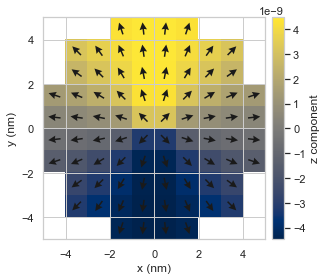

In [2]:
p1 = (-5e-9, -5e-9, -2e-9)
p2 = (5e-9, 5e-9, 10e-9)
cell = (1e-9, 1e-9, 1e-9)
mesh = df.Mesh(p1=p1, p2=p2, cell=cell)

value_fun = lambda pos: (pos[0], pos[1], pos[2]*pos[1])

def norm_fun(pos):
    x, y, z = pos
    if x**2 + y**2 < 5e-9**2:
        return 1
    else:
        return 0
    
field = df.Field(mesh, dim=3, value=value_fun, norm=norm_fun)

field.plane('z').mpl()

In [3]:
field.norm.k3d_nonzero()

Output()

In [4]:
field.plane('z').k3d_vectors(color_field=field.x)

Output()

In [5]:
field.x.k3d_voxels(filter_field=field.norm)

Output()

In [6]:
field.plane('z').z.k3d_voxels(filter_field=field.norm)

Output()

In [7]:
import ipywidgets

In [8]:
def f(x):
    return x

In [9]:
ipywidgets.interact(f, x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f(x)>

In [10]:
ipywidgets.interact(f, x=0.1)

interactive(children=(FloatSlider(value=0.1, description='x', max=0.30000000000000004, min=-0.1), Output()), _…

<function __main__.f(x)>

In [11]:
ipywidgets.interact(f, x=['a', 'b', 'c'])

interactive(children=(Dropdown(description='x', options=('a', 'b', 'c'), value='a'), Output()), _dom_classes=(…

<function __main__.f(x)>

In [12]:
ipywidgets.interact(f, x='Marijan')

interactive(children=(Text(value='Marijan', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

In [13]:
@ipywidgets.interact(x=True, y=1.0)
def g(x, y):
    return x, y

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

In [14]:
@ipywidgets.interact(x=10, y=ipywidgets.fixed(10))
def g(x, y):
    return x, y

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [15]:
x_slider = ipywidgets.IntSlider(min=-10, max=20, step=1, value=5)
@ipywidgets.interact_manual(x=x_slider, y=ipywidgets.fixed(10))
def g(x, y):
    return x, y

interactive(children=(IntSlider(value=5, description='x', max=20, min=-10), Button(description='Run Interact',…

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def f(m, b):
    #plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    #plt.show()

interactive_plot = ipywidgets.interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

## With field

In [17]:
@ipywidgets.interact(z=0)
def myplot(z):
    field.plane(z=z).mpl()

interactive(children=(IntSlider(value=0, description='z', max=1), Output()), _dom_classes=('widget-interact',)…

In [18]:
@ipywidgets.interact(z=ipywidgets.FloatSlider(min=-2.5, max=5, step=0.5, value=0, readout_format='.10f'))
def f(z):
    return z

interactive(children=(FloatSlider(value=0.0, description='z', max=5.0, min=-2.5, readout_format='.10f', step=0…

In [19]:
minv = -3.5e-9
maxv = 5.5e-9
stepv = 0.5e-9
vals = np.arange(minv, maxv+1e-20, stepv)
labels = np.around(np.arange(minv/1e-9, maxv/1e-9 + 1e-20, stepv/1e-9), decimals=3)
options = list(zip(labels, vals))
@ipywidgets.interact(z=ipywidgets.SelectionSlider(options=options, description='z (nm)', readout_format='.2f'))
def f(z):
    return z

interactive(children=(SelectionSlider(description='z (nm)', options=((-3.5, -3.5e-09), (-3.0, -3e-09), (-2.5, …

In [20]:
@ipywidgets.interact(z=field.mesh.slider('z', continuous_update=True),
                     axis=field.mesh.axis_selection(widget='radiobuttons', description='something'))
def myplot(z, axis):
    getattr(field, axis).plane(z=z).mpl(figsize=(6, 6))

interactive(children=(SelectionSlider(description='z (nm)', index=6, options=((-1.5, -1.5000000000000002e-09),…

In [26]:
import k3d
plot = k3d.plot()
plot.display()

@ipywidgets.interact(z=field.mesh.slider('z', continuous_update=True),
                     axis=field.mesh.axis_selection())
def myplot(z, axis):
    getattr(field, axis).plane(z=z).k3d_voxels(filter_field=field.norm, interactive=True, total_region=field.mesh.region, plot=plot)    

Output()

interactive(children=(SelectionSlider(description='z (nm)', index=6, options=((-1.5, -1.5000000000000002e-09),…